In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drugDATA.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
for col in ['BP', 'Cholesterol', 'Drug']:
    print(col)
    print(df[col].value_counts())

BP
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
le_sex_mapping = dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))
print(le_sex_mapping)

le_bp = LabelEncoder()
df['BP'] = le_bp.fit_transform(df['BP'])
le_bp_mapping = dict(zip(le_bp.classes_, le_bp.transform(le_bp.classes_)))
print(le_bp_mapping)

le_ch = LabelEncoder()
df['Cholesterol'] = le_ch.fit_transform(df['Cholesterol'])
le_ch_mapping = dict(zip(le_ch.classes_, le_ch.transform(le_ch.classes_)))
print(le_ch_mapping)

{'F': 0, 'M': 1}
{'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
{'HIGH': 0, 'NORMAL': 1}


In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


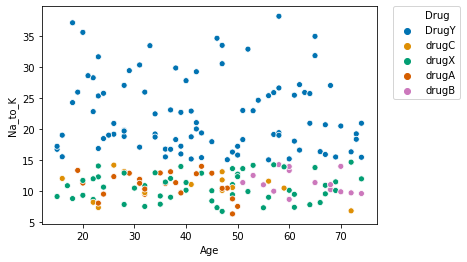

In [10]:
#scatterplot Age and Na_to_K attributes to get insight
sns.set_palette('colorblind')
sns.scatterplot(x = 'Age', y = 'Na_to_K', data = df, hue = 'Drug')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#Patient with high Na to Potassium Ration uses drugY

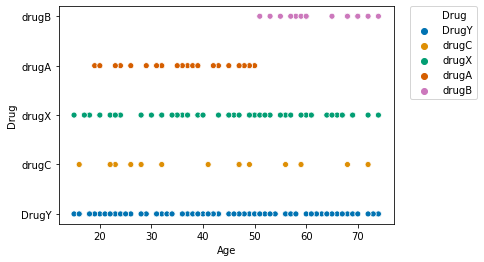

In [11]:
#scatterplot Age and Drug attributes to get insight
sns.scatterplot(x = 'Age', y = 'Drug', data = df, hue = 'Drug')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# drugB is only used by patients > 50 years old
# drugA is only used by patients < 50 years old

{'HIGH': 0, 'LOW': 1, 'NORMAL': 2}

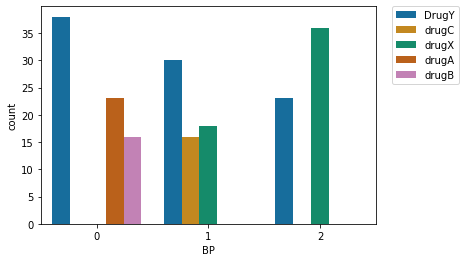

In [12]:
#countplot BP attribute to get insight
sns.countplot(x="BP", hue="Drug", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
le_bp_mapping
#DrugB is for High BP
#DrugC isnt for High BP
#DrugA and DrugB isnt for Low BP
#DrugC A B isnt for Normal BP

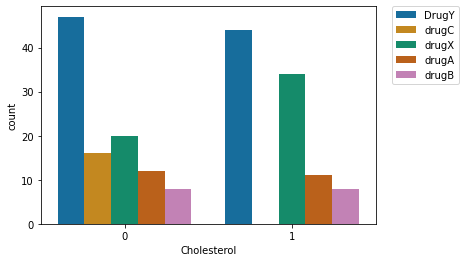

In [13]:
#countplot Cholesterol attribute to get insight
sns.countplot(x="Cholesterol", hue="Drug", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# le_ch_mapping
# drugC not for normal cholesterol

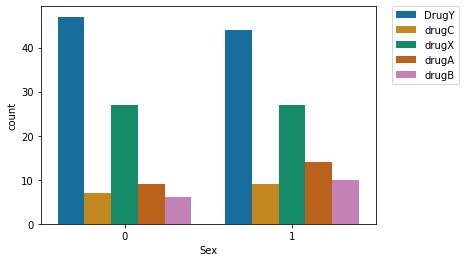

In [14]:
sns.countplot(x="Sex", hue="Drug", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# le_sex_mapping

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Drug', axis = 1)
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [17]:
#make a classification of the types of drugs used to find out the right type of drug quickly
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score, f1_score
dt = DT(criterion = 'entropy').fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(f'Acc : {accuracy_score(y_test, y_pred)}')
print(f'F1 : {f1_score(y_test, y_pred, average = "macro")}')

Acc : 0.9666666666666667
F1 : 0.9199999999999999


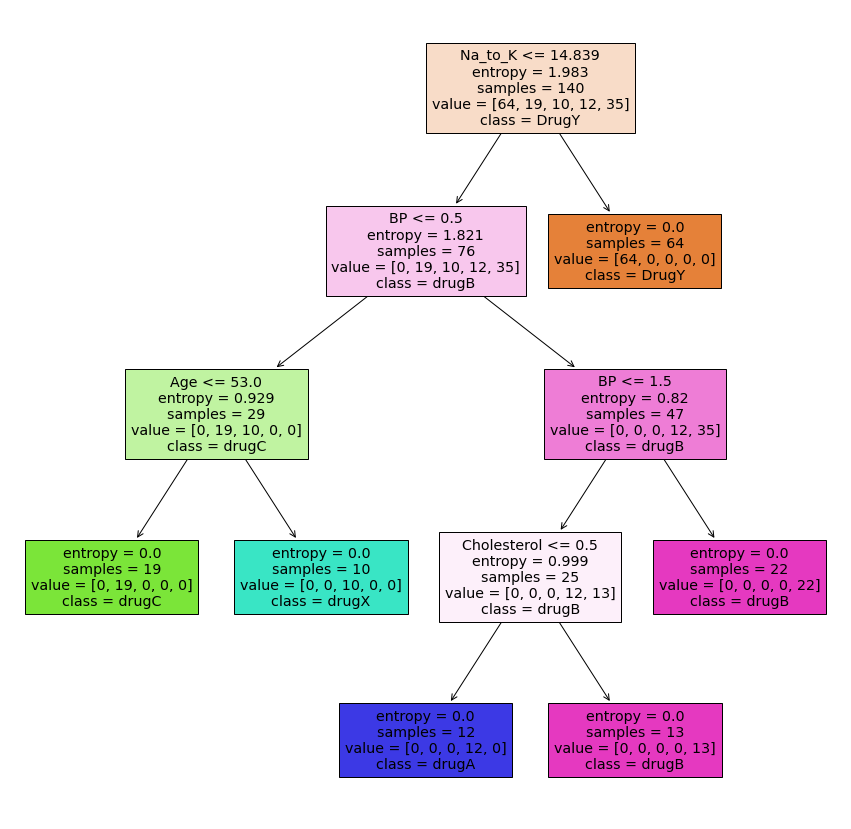

Sex : {'F': 0, 'M': 1}
Blood Pressure : {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
Cholesterol : {'HIGH': 0, 'NORMAL': 1}


In [18]:
#plotting the tree
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt,
               feature_names = X.columns,
               filled = True,
               label = 'all',
               class_names = y.unique());
plt.show()
print(f"Sex : {le_sex_mapping}")
print(f"Blood Pressure : {le_bp_mapping}")
print(f"Cholesterol : {le_ch_mapping}")

In [19]:
#predicting new data
new = pd.DataFrame({
    'Age' : [22, 27, 56, 56],
    'Sex' : ['M','M','M','F'],
    'BP' : ['NORMAL', 'NORMAL', 'HIGH', 'NORMAL'],
    'Cholesterol' : ['HIGH', 'NORMAL', 'NORMAL', 'NORMAL'],
    'Na_to_K' : [14, 14, 14 ,14]
})
new

,Age,Sex,BP,Cholesterol,Na_to_K
0,22,M,NORMAL,HIGH,14
1,27,M,NORMAL,NORMAL,14
2,56,M,HIGH,NORMAL,14
3,56,F,NORMAL,NORMAL,14


In [20]:
new_e = new
new_e['Sex'] = le_sex.transform(new_e['Sex'])
new_e['BP'] = le_bp.transform(new_e['BP'])
new_e['Cholesterol'] = le_ch.transform(new_e['Cholesterol'])

new['Pred'] = dt.predict(new_e)

In [21]:
new

,Age,Sex,BP,Cholesterol,Na_to_K,Pred
0,22,1,2,0,14,drugX
1,27,1,2,1,14,drugX
2,56,1,0,1,14,drugB
3,56,0,2,1,14,drugX


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  
cm_df = pd.DataFrame(cm,
                     index = ['drugY','drugA','drugB','drugC','drugX'], 
                     columns = ['drugY','drugA','drugB','drugC','drugX'])

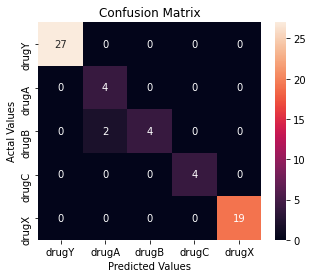

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [24]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667
